# Project Details

* The tasks in this project are as follows:
* Gathering data
* Assessing data
* Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 1)  data wrangling efforts and 2) data analyses and visualizations

# 1. Gathering Data for this Project: 

* Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. Download twitter_archive_enhanced.csv manually 

2. Downloaded image_predictions.tsv programmatically with Requests library 
URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
# import libraries
import tweepy
import json
import pandas as pd
import requests 
import os 
from timeit import default_timer as timer
from datetime import datetime,timedelta

# (1).Gather the second piece of data programatically with Requests library

In [2]:
# create a folder for the file 
folder_name = 'Project4_Data'
if not os.path.exists(folder_name): 
    os.makedirs(folder_name)
    
# write the request content into a file    
url_list = ["https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv",
            "https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
           ]
for url in url_list:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]),mode ='wb') as file:
        file.write(response.content)

# check if it works successfully
os.listdir(folder_name)   

['image-predictions.tsv', 'tweet-json.txt']

# (2). Gather the third piece of data through twitter API 

* Some APIs are completely open, like MediaWiki (accessed via the wptools library) in Lesson 2. 
* Others require authentication. The Twitter API is one that requires users to be authorized to use it. This means that before you can run your API querying code, you need to set up your own Twitter application. The steps are in a separate file called How_to_Query_Twitter_Data.txt


In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = df_archive.tweet_id.values


In [4]:
len(tweet_ids)

2356

In [ ]:
# read in 'twitter-archive-enhanced.csv' to panda dataframe, access tweet_id column
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = '#################'
consumer_secret = '#####################'
access_token = '##########################'
access_secret = '#########################'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



# Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

* Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

# 2. Assess Data and Document Issues

In [54]:
# Before assess, make a copy of these 3 data sets
pd_achive = pd.read_csv('twitter-archive-enhanced.csv')
# pd_achive['tweet_id'].values   # return an array 
pd_achive_copy = pd_achive.copy()

In [55]:
pd_predictions = pd.read_csv(os.path.join(folder_name, 'image-predictions.tsv'), sep='\t')
pd_predictions_copy = pd_predictions.copy()

In [56]:
# read in json file into panda dataframe 
pd_json = pd.read_json(os.path.join(folder_name, 'tweet-json.txt'), lines=True)
pd_json = pd_json[['id','retweet_count','favorite_count']]
pd_json_copy = pd_json.copy()

In [57]:
pd_achive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [58]:
pd_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [59]:
pd_json_copy.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [60]:
pd_achive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [61]:
pd_achive_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [62]:
pd_achive_copy.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [63]:
pd_achive_copy.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [64]:
pd_achive_copy.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [65]:
# pd_achive_copy.tweet_id.duplicated().sum()
pd_achive_copy[pd_achive_copy['retweeted_status_id'].notnull() ==True]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [66]:
pd_achive_copy.name.duplicated().sum()   


1399

In [67]:
pd_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
pd_predictions_copy.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [69]:
pd_predictions_copy.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [70]:
pd_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [71]:
pd_json_copy.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [72]:
pd_json_copy.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

# (1)Quality Issues ( Content Issues)

pd_achive_copy:
1. remove extra contents for urls in source column ( eg: <a href= ) 
2. chop extra contents for timestamp column (+0000)   
3. Under name column, multiple expressions for missing names : a/an/the/none for 
4. Erroneous datatypes  : 
    * tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id      
    all should be string not float ;
    * 'img_num', 'retweet_count', 'favorite_count' should be integer not float
5. when there are two fractions in the text, the rating goes with the first one, which is not always correct.
( 835000000000000000 , 666000000000000000 , 835000000000000000 )
6. some rating are not relevant.(832000000000000000 , 811000000000000000 : : date versus rating , missing rating  )
7. some of the tweets are not original tweets.
8. "doggo,floofer, pupper,puppo" in pd_achive_copy table are values under one column "stage"

pd_prediction_copy:
9. The values under columns p_1 , p_2, p_3 should not have "_" in the breads ( Irish_terrier)
10. "tweet_id" is named "id" in pd_json_copy table ( This one I did before fixing tidiness issues


# (2)Tidiness Issues ( Structure Issues)
1. pd_prediction_copy and pd_json_copy tables are part of pd_achive_copy table
2. rating_numerator and rating_denominator should be one column rating
3. "doggo,floofer, pupper,puppo" in pd_achive_copy are values under type column , should not be separate column names
4. split date and time into two separate columns


# 3.Cleaning Data 
Cleaning steps will be as follows:
1. Completeness issue: nothing we can do at this point
2. Tidiness issues
3. Quality issues

# (1) Fixing Tidiness Issues

1).Define:
* rename pd_json_copy "id" column by "tweet_id" . This one is not tidiness issue but we have to make the column names consistent in order to merge in the second cleaning step 

Code:

In [73]:
# not tidiness issue. But solve it first for merging tables later
pd_json_copy.rename(index=str, columns = {'id':'tweet_id'},inplace=True)

Test:

In [74]:
pd_json_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


2).Define: 
* pd_predictions_copy and pd_json_copy tables are part of pd_achive_copy table. Merge three tables by using merge() function

Code:

In [75]:
pd_achive_copy = pd.merge(pd_achive_copy,pd_predictions_copy,on = 'tweet_id' ,how = 'left')
pd_achive_copy = pd.merge(pd_achive_copy,pd_json_copy,on = 'tweet_id' ,how = 'left')

Test:

In [76]:
pd_achive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [77]:
pd_achive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


3) Define:
* rating_numerator and rating_denominator should be merged into one column rating

Code:

In [78]:
# add a new column rating into the dataframe by combining rating_numerator and rating_denominator
pd_achive_copy['rating'] = pd_achive_copy['rating_numerator'].astype(str) +"/" + pd_achive_copy['rating_denominator'].astype(str)
pd_achive_copy = pd_achive_copy.drop(['rating_numerator', 'rating_denominator'],axis=1)  # drop only need the columns' name not the whole series

Test:

In [79]:
pd_achive_copy['rating']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
5       13/10
6       13/10
7       13/10
8       13/10
9       14/10
10      13/10
11      13/10
12      13/10
13      12/10
14      13/10
15      13/10
16      12/10
17      13/10
18      13/10
19      13/10
20      12/10
21      13/10
22      14/10
23      13/10
24      13/10
25      12/10
26      13/10
27      13/10
28      13/10
29      12/10
        ...  
2326     2/10
2327     7/10
2328     9/10
2329    11/10
2330     6/10
2331     8/10
2332    10/10
2333     9/10
2334     3/10
2335      1/2
2336    11/10
2337    10/10
2338     1/10
2339    11/10
2340     8/10
2341     9/10
2342     6/10
2343    10/10
2344     9/10
2345    10/10
2346     8/10
2347     9/10
2348    10/10
2349     2/10
2350    10/10
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: rating, Length: 2356, dtype: object

In [80]:
pd_achive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'rating'],
      dtype='object')

4) . Define: 
* "doggo,floofer, pupper,puppo" in pd_achive_copy table are values under one column "stage" by using lambda to join them together and replace the value types with proper values .


Code:

In [81]:
pd_achive_copy['stage'] = pd_achive_copy[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

# for single one stage 
pd_achive_copy['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
pd_achive_copy['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
pd_achive_copy['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
pd_achive_copy['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
pd_achive_copy['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True) 

# for multiple stages 
pd_achive_copy['stage'].replace("doggoNonepupperNone","multiple", inplace=True) 
pd_achive_copy['stage'].replace("doggoNoneNonepuppo","multiple", inplace=True) 
pd_achive_copy['stage'].replace("doggoflooferNoneNone","multiple", inplace=True) 


Test:

In [82]:
pd_achive_copy.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,13/10,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,13/10,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,12/10,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,13/10,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,12/10,None


In [83]:
# comfirm the number and stage with value_counts()
pd_achive_copy.stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: stage, dtype: int64

5) Define:
*  split date and time into two separate columns

Code:

In [84]:
pd_achive_copy['date'] , pd_achive_copy['time'] = pd_achive_copy['timestamp'].str.split(' ',1).str
pd_achive_copy['date'] = pd_achive_copy['date'].replace('-','')
pd_achive_copy['time'] = pd_achive_copy['time'].replace(':','')

Test:

In [85]:
pd_achive_copy[['date','time']]

,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000
5,2017-07-29,00:08:17 +0000
6,2017-07-28,16:27:12 +0000
7,2017-07-28,00:22:40 +0000
8,2017-07-27,16:25:51 +0000
9,2017-07-26,15:59:51 +0000


# (2). Fix Quality Issues

In [86]:
pd_achive_copy['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

1) Define: 
* Remove extra parts of urls in source column using split() function 

Code:

In [87]:
pd_achive_copy['source'][0].split('"')[1::2][0]

for i in range(len(pd_achive_copy['source'])):
    pd_achive_copy['source'][i] = pd_achive_copy['source'][i].split('"')[1::2][0]
    # [1::2] slicing to get odd values 
    # [0] get the first value after slicing 


C:\Users\Xi Zhou\Miniconda3\envs\my_working_environment3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Test:

In [88]:
pd_achive_copy['source'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

2) Define:
*  chop "+0000" off from timestamp column with rstrip() in pd_achive_copy table 


Code:

In [89]:
pd_achive_copy[['date','time']].head()

,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [90]:
# pd_achive_copy.timestamp = pd_achive_copy.timestamp.str[:-6]  # does not work if a time stample is in correct format
# try with one sample , then you know why it is incorrect.  pd_achive_copy.timestamp.iloc[0].rstrip('+0000')
pd_achive_copy.time = pd_achive_copy.time.str.rstrip('+0000') # here put it into two steps becuase some timestamp values

In [91]:
pd_achive_copy = pd_achive_copy.drop( columns = ['timestamp'] , axis=1) # drop only need column name as parameter

Test:

In [93]:
pd_achive_copy[['date','time']].head()

,date,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24


3) Define:
* Multiple expressions for missing values under name column in pd_achive_copy table
* Replace " a, an, the " with none

Code:

In [94]:
# I can not create a list here to add faulty names coz there is no standard for faulty name , have to do it manully

faulty_name = ['a','an','the','light','life','by','actually','just','getting','infuriating','old','all','this','very',
              'mad','not','one','my','O','quite','such']
pd_achive_copy['name'] = pd_achive_copy['name'].replace( faulty_name , 'none' )  

Test:

In [95]:
pd_achive_copy['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          none
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        none
2327        none
2328        None
2329        None
2330        None
2331        None
2332        None
2333        none
2334        none
2335        none
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        none
2346        none
2347        none
2348        none
2349        none
2350        none
2351        None
2352        none
2353        no

4) Define:
* Fix data types issues: 
* change 'img_num', 'retweet_count', 'favorite_count' from float to integer 
* change tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id from float to integer


Code:

In [96]:
import numpy as np
# convert multiple columns from float to integer at one time 
# but need to consider nan
list_counts = [ 'img_num', 'retweet_count', 'favorite_count']
pd_achive_copy[list_counts] = pd_achive_copy[list_counts].fillna(0.0).applymap(np.int64)

list_ids = ['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
pd_achive_copy[list_ids] = pd_achive_copy[list_ids].astype(str)


Test:

In [97]:
pd_achive_copy.dtypes

tweet_id                       object
in_reply_to_status_id          object
in_reply_to_user_id            object
source                         object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog                         object
retweet_count                   int64
favorite_cou

5) Define:
* when there are two fractions in the text, the rating goes with the first one, which is not always correct or slicing the wrong friction 
* (835000000000000000 replace 960/0 with 13/10 , 
* 666000000000000000  replace 1/2 with 9/10 , 
* 832000000000000000 replace '75/10' with'9.75/10'), 
* 716000000000000000 replace 50/50 with " 11/10" 


Code:

In [98]:
pd_achive_copy['rating'] = pd_achive_copy['rating'].replace('960/0','13/10')
pd_achive_copy['rating'] = pd_achive_copy['rating'].replace('1/2','9/10')
pd_achive_copy['rating'] = pd_achive_copy['rating'].replace('75/10','9.75/10')
pd_achive_copy['rating'] = pd_achive_copy['rating'].replace('50/50','11/10')

Test:

In [99]:
pd_achive_copy.query('rating=="960/0" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time


In [100]:
pd_achive_copy.query('rating=="1/2" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time


In [101]:
pd_achive_copy.query('rating=="75/10" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time


In [102]:
pd_achive_copy.query('rating=="50/50" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time


6). Define: 
* some rating are not relevant.( date versus rating , 811000000000000000 )

Code:

In [103]:
pd_achive_copy['rating'] = pd_achive_copy['rating'].replace('24/7','none')

Test:

In [104]:
pd_achive_copy.query('rating=="24/7" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time



7). Define:
* remove retweets by drop the rows when the values of retweet_ids are not none

Code:

In [105]:
pd_achive_copy[pd_achive_copy['retweeted_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time
19,888202515573088257,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Canela. She attempted s...,8.874739571039519e+17,4196983835.0,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,Canela,...,True,beagle,0.038915,True,0,0,13/10,None,2017-07-21,01:02:36
32,886054160059072513,nan,nan,http://twitter.com/download/iphone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537344211026e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,None,...,NaN,NaN,NaN,NaN,108,0,12/10,None,2017-07-15,02:45:48
36,885311592912609280,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Lilly. She just paralle...,8.305833205850685e+17,4196983835.0,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,Lilly,...,False,pug,0.011933,True,19297,0,13/10,None,2017-07-13,01:35:06
68,879130579576475649,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576130401157e+17,4196983835.0,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,Emmy,...,NaN,NaN,NaN,NaN,7181,0,14/10,None,2017-06-26,00:13:58
73,878404777348136964,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815110064783e+17,4196983835.0,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",Shadow,...,NaN,NaN,NaN,NaN,1349,0,13/10,None,2017-06-24,00:09:53
74,878316110768087041,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690003974455337e+17,4196983835.0,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,Terrance,...,NaN,NaN,NaN,NaN,6965,0,11/10,None,2017-06-23,18:17:33
78,877611172832227328,nan,nan,http://twitter.com/download/iphone,RT @rachel2195: @dog_rates the boyfriend and h...,8.76850772322988e+17,512804507.0,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,None,...,True,Irish_terrier,0.107473,True,83,0,14/10,pupper,2017-06-21,19:36:23
91,874434818259525634,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Coco. At first I though...,8.663349647612027e+17,4196983835.0,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,Coco,...,NaN,NaN,NaN,NaN,15546,0,12/10,None,2017-06-13,01:14:41
95,873697596434513921,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Walter. He won't start ...,8.688803978194944e+17,4196983835.0,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,Walter,...,True,printer,0.077130,False,12518,0,14/10,None,2017-06-11,00:25:14
97,873337748698140672,nan,nan,http://twitter.com/download/iphone,RT @dog_rates: This is Sierra. She's one preci...,8.732137756329779e+17,4196983835.0,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,Sierra,...,NaN,NaN,NaN,NaN,1667,0,12/10,pupper,2017-06-10,00:35:19


In [106]:
# sample : df.drop(df[df.score < 50].index, inplace=True)
pd_achive_copy.drop(pd_achive_copy[pd_achive_copy['retweeted_status_id'] != 'nan'].index , inplace=True )
# DataFrame.index : return The index (row labels) of the DataFrame.
# here notnull() does not work for me 

Test:

In [107]:
pd_achive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time
0,892420643555336193,nan,nan,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,False,banana,0.076110,False,8853,39467,13/10,None,2017-08-01,16:23:56
1,892177421306343426,nan,nan,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,True,papillon,0.068957,True,6514,33819,13/10,None,2017-08-01,00:17:27
2,891815181378084864,nan,nan,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,True,kelpie,0.031379,True,4328,25461,12/10,None,2017-07-31,00:18:03
3,891689557279858688,nan,nan,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,True,spatula,0.040836,False,8964,42908,13/10,None,2017-07-30,15:58:51
4,891327558926688256,nan,nan,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,True,German_short-haired_pointer,0.175219,True,9774,41048,12/10,None,2017-07-29,16:00:24
5,891087950875897856,nan,nan,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,None,...,True,Indian_elephant,0.076902,False,3261,20562,13/10,None,2017-07-29,00:08:17
6,890971913173991426,nan,nan,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,...,True,ice_lolly,0.193548,False,2158,12041,13/10,None,2017-07-28,16:27:12
7,890729181411237888,nan,nan,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,None,...,True,Pembroke,0.076507,True,16716,56848,13/10,None,2017-07-28,00:22:40
8,890609185150312448,nan,nan,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,...,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226,13/10,None,2017-07-27,16:25:51
9,890240255349198849,nan,nan,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,...,True,Chihuahua,0.029248,True,7711,32467,14/10,doggo,2017-07-26,15:59:51


8) Define:
   remove the "_" in the values under p1 , p2 , p3 columns with replace()

Code:

In [108]:
#name_list = ['p1', 'p2', 'p3' ]
#pd_achive_copy[name_list] = pd_achive_copy[name_list].replace('_',' ')  why not work ???
pd_achive_copy['p1'] = pd_achive_copy['p1'].str.replace('_', ' ')
pd_achive_copy['p2'] = pd_achive_copy['p2'].str.replace('_', ' ')
pd_achive_copy['p3'] = pd_achive_copy['p3'].str.replace('_', ' ')

Test:

In [109]:
pd_achive_copy[['p1', 'p2', 'p3']] 

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper towel,Labrador retriever,spatula
4,basset,English springer,German short-haired pointer
5,Chesapeake Bay retriever,Irish terrier,Indian elephant
6,Appenzeller,Border collie,ice lolly
7,Pomeranian,Eskimo dog,Pembroke
8,Irish terrier,Irish setter,Chesapeake Bay retriever
9,Pembroke,Cardigan,Chihuahua


In [110]:
# save the clean data 
pd_achive_copy.to_csv('twitter_archive_master.csv',index=False)

# 4. Visulize and Analyze the Data 

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
import seaborn as sb 

In [155]:
pd_achive_clean = pd.read_csv('twitter_archive_master.csv')

In [157]:
pd_achive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,False,banana,0.076110,False,8853,39467,13/10,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,True,papillon,0.068957,True,6514,33819,13/10,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,True,kelpie,0.031379,True,4328,25461,12/10,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,True,spatula,0.040836,False,8964,42908,13/10,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,True,German short-haired pointer,0.175219,True,9774,41048,12/10,None,2017-07-29,16:00:24


In [151]:
pd_achive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'rating', 'stage', 'date', 'time'],
      dtype='object')

In [158]:
pd_achive_clean[['date','time']]

,date,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24
5,2017-07-29,00:08:17
6,2017-07-28,16:27:12
7,2017-07-28,00:22:40
8,2017-07-27,16:25:51
9,2017-07-26,15:59:51


## Some thoughts to Explore:
1. Does dog stage ('doggo','floofer', 'pupper', 'puppo') have correlation with favorite_count and retweet_count ?
2. Does the timestamp have relation with favorite_count and retweet_count ?
3. What are the top breads ?

1. What is the relationship between dog stages and retweet counts and favorite counts ? 

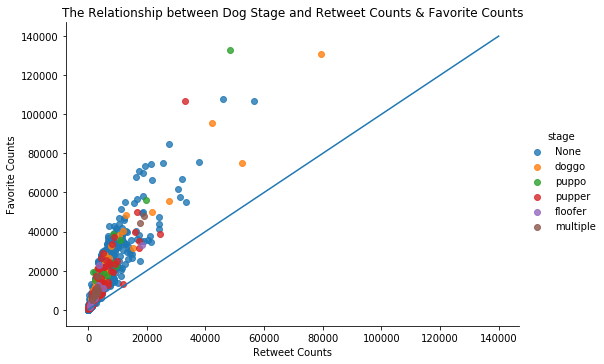

In [159]:
g = sb.FacetGrid(data = pd_achive_clean , hue = 'stage' , height = 5 , aspect = 1.5)
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 140000], [0, 140000], '-')

Conclusion: According to my plot, most of the retweet are below 40000 and most of the favorite count are below 80000. No matter what stage it is, there seems to be more favorite counts than retweet counts, which is understandable. An interesting finding is that doggo, puppo and pupper seem to gain more retweets and favorite counts. Dog stage is very likely a factor affecting the retweet counts and favorite counts. 

2. What time to post the tweets turns to gain more popularity and retweets ?


In [162]:
pd_achive_clean[['date','time']].head()

,date,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24


In [172]:
# I just need the hour of time column to see the infulence 
pd_achive_clean['time'] = pd.DatetimeIndex(pd_achive_clean['time']).hour
#hours = pd_achive_clean['time'].dt.hour    # AttributeError: Can only use .dt accessor with datetimelike values

In [190]:
pd_achive_clean['time'].head()

0    16
1     0
2     0
3    15
4    16
Name: time, dtype: int64

Text(0,0.5,'Number of Tweets Posted')

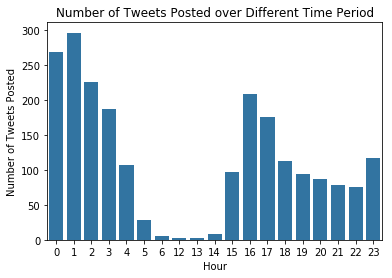

In [192]:
# At what time people tend to post tweets ?
base_color = sb.color_palette()[0]
sb.countplot(data = pd_achive_clean ,  x = 'time' , color = base_color )
plt.title('Number of Tweets Posted over Different Time Period')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets Posted')


Text(0.5,1,'The Relationship between Time and Retweet Counts & Favorite Counts')

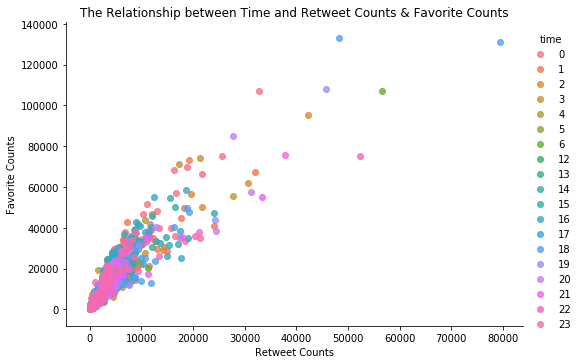

In [196]:
# plot the relationship between time and retweet & favorite counts 
g = sb.FacetGrid(data = pd_achive_clean , hue = 'time', height = 5 , aspect = 1.5 )
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Time and Retweet Counts & Favorite Counts')


Conclusion 2:
* According to the plot, we can see there are two activity peaks 0-3 and 16-17. Users like to post tweets either at the time before off work or late night(even 3 am belongs to early morning but It is more likely they stay late until 3 am rather than they get up at 3 am to post tweets). 

* It is shown that tweets posted at evening time or late night gains more retweets and favorites. It is generally consistent with the two activity peaks. More users are active at the peorids, which generate more retweets and favorite counts.

3. What are the top breeds ? 

In [200]:
# next let's condense the dog breed analysis
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
    # this isn't about the parsing AI so the rest of this data is deletable

pd_achive_clean.apply(breed_confidence, axis=1)
pd_achive_clean['breed'] = breed
pd_achive_clean['confidence'] = confidence
pd_achive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p3_conf,p3_dog,retweet_count,favorite_count,rating,stage,date,time,breed,confidence
0,892420643555336193,NaN,NaN,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,...,0.076110,False,8853,39467,13/10,None,2017-08-01,16,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,...,0.068957,True,6514,33819,13/10,None,2017-08-01,0,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,...,0.031379,True,4328,25461,12/10,None,2017-07-31,0,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,...,0.040836,False,8964,42908,13/10,None,2017-07-30,15,Labrador retriever,0.168086
4,891327558926688256,NaN,NaN,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,...,0.175219,True,9774,41048,12/10,None,2017-07-29,16,basset,0.555712
5,891087950875897856,NaN,NaN,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,...,0.076902,False,3261,20562,13/10,None,2017-07-29,0,Chesapeake Bay retriever,0.425595
6,890971913173991426,NaN,NaN,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,...,0.193548,False,2158,12041,13/10,None,2017-07-28,16,Appenzeller,0.341703
7,890729181411237888,NaN,NaN,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,...,0.076507,True,16716,56848,13/10,None,2017-07-28,0,Pomeranian,0.566142
8,890609185150312448,NaN,NaN,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,...,0.118184,True,4429,28226,13/10,None,2017-07-27,16,Irish terrier,0.487574
9,890240255349198849,NaN,NaN,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,...,0.029248,True,7711,32467,14/10,doggo,2017-07-26,15,Pembroke,0.511319


Text(0,0.5,'Breed')

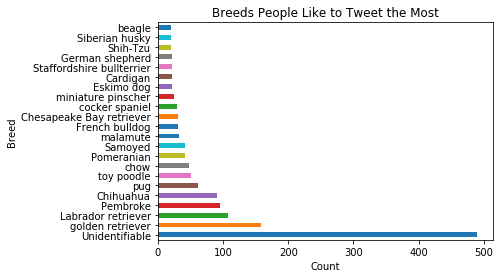

In [213]:
top_breeds=pd_achive_clean.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Breeds People Like to Tweet the Most')
plt.xlabel('Count')
plt.ylabel('Breed')

Conclusion 3 : 
There is a large number of unidentifiable breed. I tried to investigate the reasons. One reason is that the picture has nothing to do with dogs. They are totally unrelated tweets. 
The top 3 popular tweeted breeds are golden retriever , labrador retriever and pembroke. 

# References:
* https://stackoverflow.com/questions/48614158/read-json-file-as-pandas-dataframe
* http://empierce.com/2017/11/14/wrangling-weratedogs/
* https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
* https://github.com/RedRock42?tab=repositories
* https://github.com/kdow/WeRateDogs
* https://github.com/MrGeislinger/UdacityDAND_Proj_WrangleAndAnalyzeData
* https://github.com/SThornewillvE/Udacity-Project---Data-Wrangling
* https://www.google.com/search?rlz=1C1SQJL_enUS762US762&q=udacity+data+wrangling+twitter+project&sa=X&sqi=2&ved=2ahUKEwi0-KyqheffAhVnwosKHWB7BGMQ1QIoAXoECAUQAg&biw=1368&bih=722
* http://www.jeannicholashould.com/tidy-data-in-python.html
* http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/
* https://stackoverflow.com/questions/1806278/convert-fraction-to-float
* https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

# Notes:
*  how to delete rows based on conditional expression :  df.drop(label, axis = 1 , inplace=True) 
* df[''].iloc[0] usually is helpful to check large dataset by getting one sample 
